In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.sparse import random

In [2]:
data={
    'Çountry':['USA','Canada','France','UK','Germany','Australia'],
    'Latitude':[44.97,62.40,46.75,54.01,51.15,-25.45],
    'Longitude':[-103.77,-96.80,2.40,-2.53,10.40,133.11],
    'Language':['English','English','French','English','German','English']
}

In [3]:
df=pd.DataFrame(data)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Çountry    6 non-null      object 
 1   Latitude   6 non-null      float64
 2   Longitude  6 non-null      float64
 3   Language   6 non-null      object 
dtypes: float64(2), object(2)
memory usage: 324.0+ bytes


In [5]:
x=df[['Latitude','Longitude']]

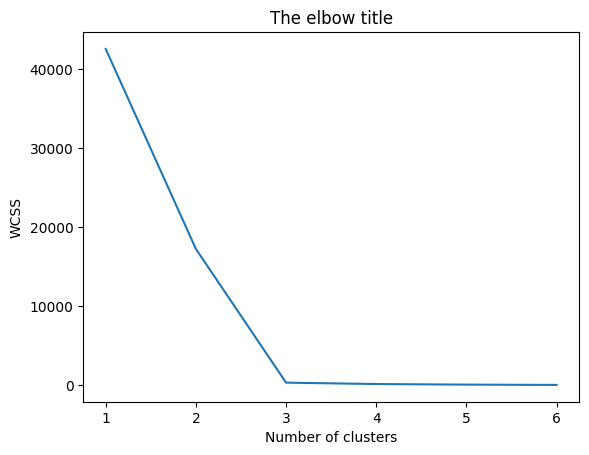

In [6]:
wcss=[]
for i in range(1,7):
  kmeans=KMeans(i)
  kmeans.fit(x)
  wcss_iter=kmeans.inertia_
  wcss.append(wcss_iter)
number_clusters=range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
num_clusters=3

In [8]:
kmeans=KMeans(n_clusters=num_clusters,random_state=42)
kmeans.fit(x)

KMeans(n_clusters=3, random_state=42)

In [9]:
labels=kmeans.labels_
df['Clusters']=labels
df

,Çountry,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


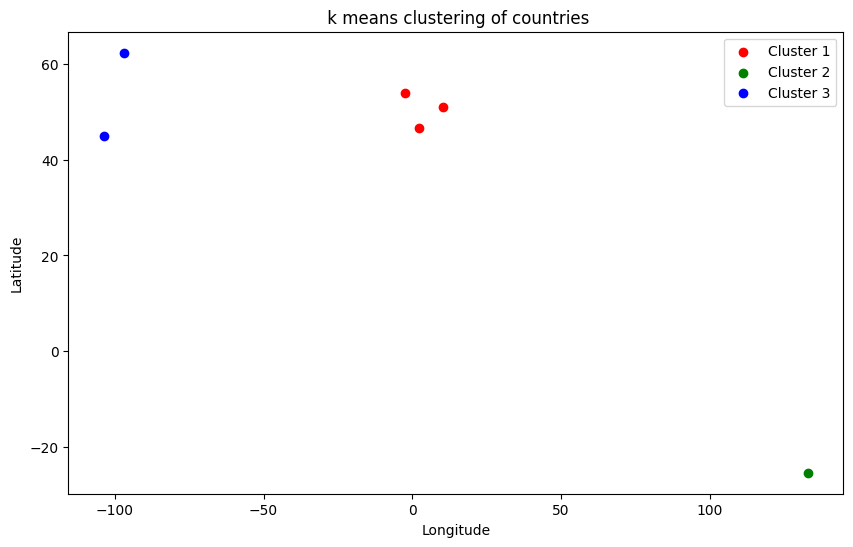

In [10]:
plt.figure(figsize=(10,6))
colors=['red','green','blue']
for i in range(num_clusters):
    cluster_data=df[df['Clusters']==i]
    plt.scatter(cluster_data['Longitude'],cluster_data['Latitude'],color=colors[i],label='Cluster {}'.format(i+1))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(' k means clustering of countries')
plt.legend()
plt.show()

In [11]:
import scipy.cluster.hierarchy as sch

In [12]:
data={
    'Çountry':['USA','Canada','France','UK','Germany','Australia'],
    'Latitude':[44.97,62.40,46.75,54.01,51.15,-25.45],
    'Longitude':[-103.77,-96.80,2.40,-2.53,10.40,133.11],
    'Language':['English','English','French','English','German','English']
}

In [13]:
df=pd.DataFrame(data)

In [14]:
x=df[['Latitude','Longitude']]

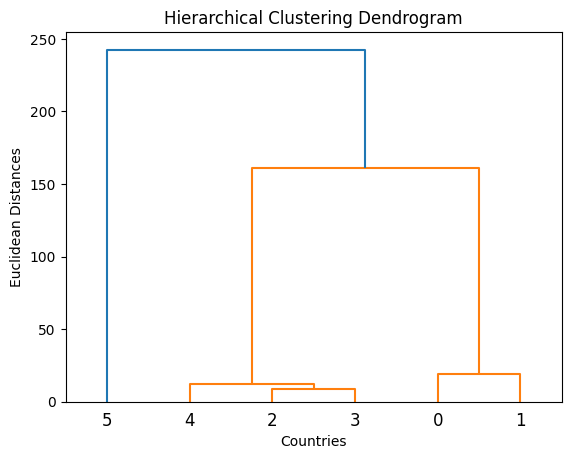

In [15]:
dendogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel("Countries")
plt.ylabel("Euclidean Distances")
plt.show()

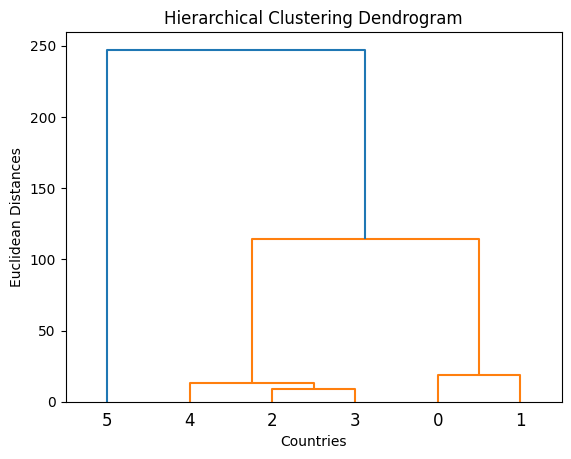

In [16]:
dendogram=sch.dendrogram(sch.linkage(x,method='complete'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel("Countries")
plt.ylabel("Euclidean Distances")
plt.show()

In [17]:
from sklearn.datasets import load_iris

In [18]:
iris = load_iris()

df = pd.DataFrame(
    iris.data,
    columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
)

df['Species'] = iris.target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [19]:
X = df[['Petal_Length', 'Petal_Width']]

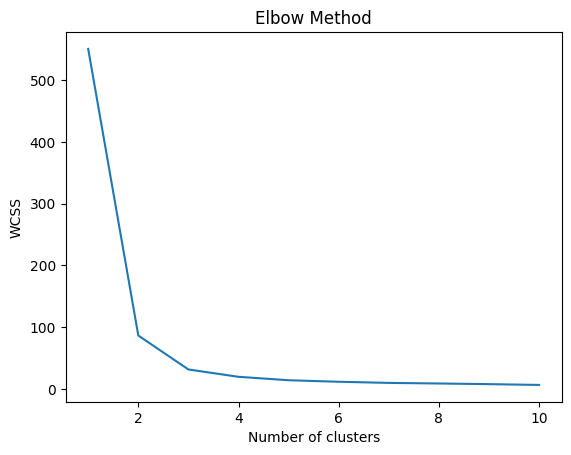

In [20]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

number_clusters = range(1, 11)

plt.plot(number_clusters, wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

labels = kmeans.labels_
df['Cluster'] = labels

df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species,Cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


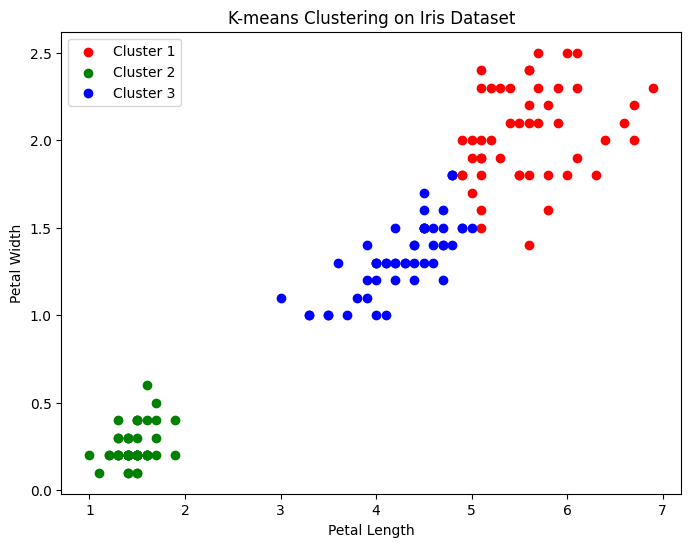

In [22]:
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']

for i in range(num_clusters):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(
        cluster_data['Petal_Length'],
        cluster_data['Petal_Width'],
        color=colors[i],
        label=f'Cluster {i+1}'
    )

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('K-means Clustering on Iris Dataset')
plt.legend()
plt.show()

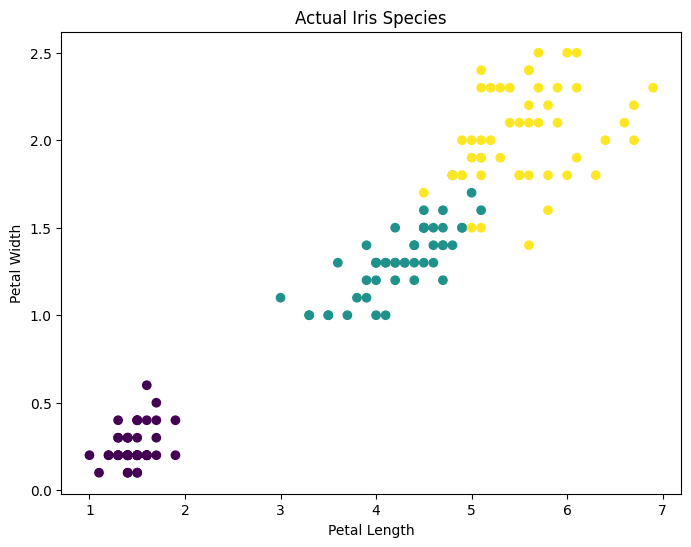

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(
    df['Petal_Length'],
    df['Petal_Width'],
    c=df['Species'],
    cmap='viridis'
)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Actual Iris Species')
plt.show()

In [24]:
X = df[['Petal_Length', 'Petal_Width']]

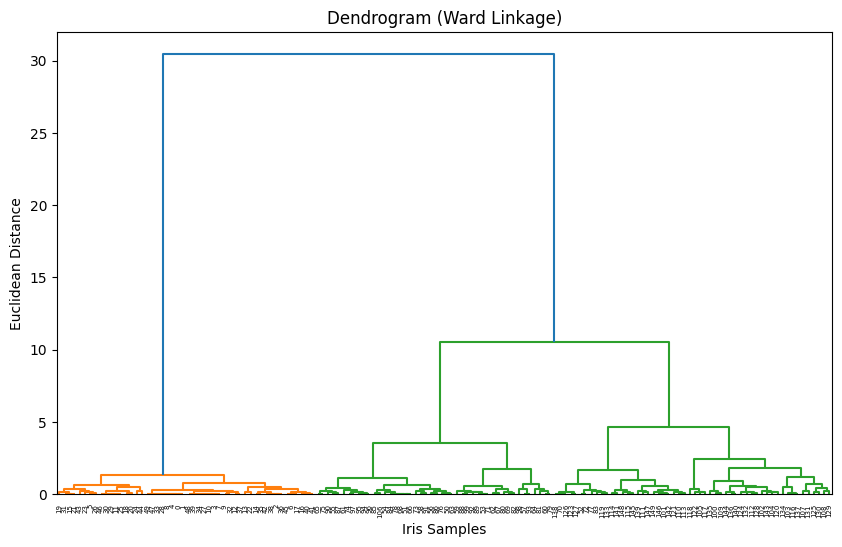

In [25]:
plt.figure(figsize=(10, 6))
sch.dendrogram(
    sch.linkage(X, method='ward')
)
plt.title('Dendrogram (Ward Linkage)')
plt.xlabel('Iris Samples')
plt.ylabel('Euclidean Distance')
plt.show()

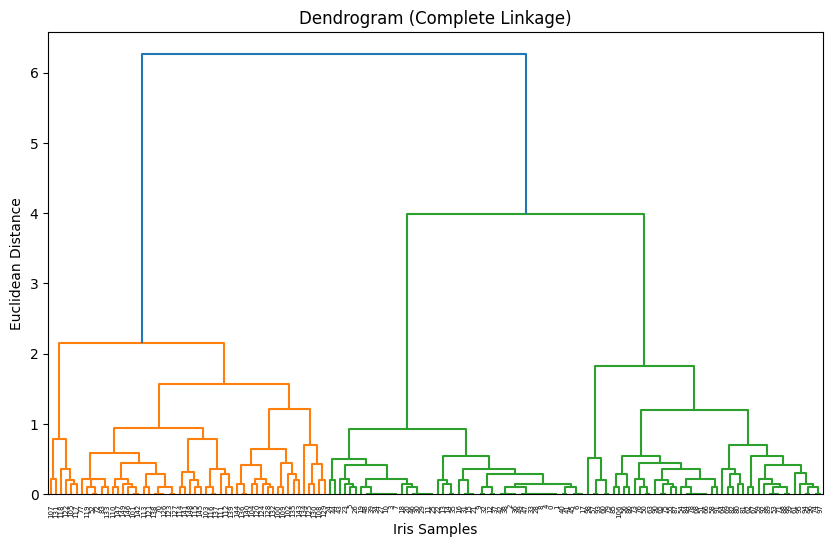

In [26]:
plt.figure(figsize=(10, 6))
sch.dendrogram(
    sch.linkage(X, method='complete')
)
plt.title('Dendrogram (Complete Linkage)')
plt.xlabel('Iris Samples')
plt.ylabel('Euclidean Distance')
plt.show()